##<center>__Самостійні завдання__</center>

> Скопіювати блок самостійних завдань в окремий файл ***LastName_CP8.ipynb***

> Інсталюйте необхідні пакети бібліотек Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

### Завдання №1

* Завантажте дані з лінку

`url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"`

<center><img src="http://sebastianraschka.com/images/blog/2015/principal_component_analysis_files/iris.png" width="600" alt="content-vs-colab.png"></center>

* задайте наступні імена колонок датафрейму:

`names=['sepal length','sepal width','petal length','petal width','class label']`
* виведіть описову статистику датасету
* побудуйте парні діаграми класів для всих ознак датасету
* сформуйте масив характеристик $X$ та цільової змінної/класу $Y$ 
* виведіть кількість елементів у кожному класі
* поділіть вибірку на навчальну та тестову у співвідношенні 30/70
 


In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

In [3]:
df.columns = ['sepal length','sepal width','petal length','petal width','class label']
df.head()

,sepal length,sepal width,petal length,petal width,class label
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df["class label"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: class label, dtype: int64

In [6]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df["class label"])
df["class label"]=label_encoder.transform(df["class label"])
df.head()

,sepal length,sepal width,petal length,petal width,class label
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


In [7]:
X = df[["sepal length", "sepal width", "petal length", "petal width"]].values
y = df[["class label"]].values

In [8]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=4)
print ('Навчальна вибірка:', X_train.shape,  y_train.shape)
print ('Тестова вибірка:', X_test.shape,  y_test.shape)

Навчальна вибірка: (44, 4) (44, 1)
Тестова вибірка: (105, 4) (105, 1)


### Завдання №2

* Проведіть стандартизацію даних
* застосуйте алгоритм LR, використовуючи `solver='liblinear'`,`solver='newton-cg'` та `solver='lbfgs'`
* порівняйте результати роботи різних оптимізаторів оціночними критиеріями 
* побудуйте багатокласову матрицю невідповідностей, та інтерпретуйте її результати
* зробіть висновки


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

In [11]:
class_names = ["Iris-versicolor", "Iris-virginica", "Iris-setosa"]

In [12]:
def train_and_predict_LR(solver):
    log_reg = LogisticRegression(solver=solver).fit(X_train,y_train)
    y_pred = log_reg.predict(X_test)
    print("Точність на навчальних даних:", metrics.accuracy_score(y_train, log_reg.predict(X_train)))
    print("Точність на тестових даних:", metrics.accuracy_score(y_test, y_pred))
    print("Матриця невідповідностей:\n", confusion_matrix(y_test, y_pred))
    print("F1 score:", f1_score(y_test, y_pred, average='weighted'))
    print("Jaccard:", jaccard_score(y_test, y_pred, average='weighted'))
    print("Classification report\n", classification_report(y_test, y_pred))
    return log_reg, y_pred

In [13]:
libilinear_model, libil_pred = train_and_predict_LR("liblinear")

Точність на навчальних даних: 0.9090909090909091
Точність на тестових даних: 0.8095238095238095
Матриця невідповідностей:
 [[35  0  0]
 [ 0 18 19]
 [ 0  1 32]]
F1 score: 0.7993197278911565
Jaccard: 0.6936572199730094
Classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.95      0.49      0.64        37
           2       0.63      0.97      0.76        33

    accuracy                           0.81       105
   macro avg       0.86      0.82      0.80       105
weighted avg       0.86      0.81      0.80       105



/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


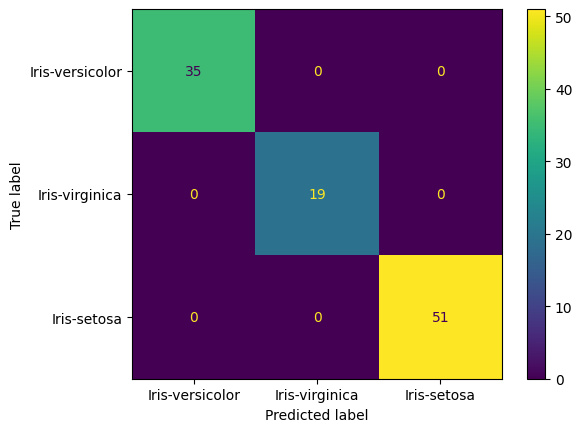

In [14]:
ConfusionMatrixDisplay.from_estimator(libilinear_model, X_test, libil_pred, display_labels=class_names)
plt.show()

In [15]:
newton_model, newton_pred = train_and_predict_LR("newton-cg")

Точність на навчальних даних: 1.0
Точність на тестових даних: 0.9333333333333333
Матриця невідповідностей:
 [[35  0  0]
 [ 0 31  6]
 [ 0  1 32]]
F1 score: 0.9332652922365109
Jaccard: 0.8786774628879892
Classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.97      0.84      0.90        37
           2       0.84      0.97      0.90        33

    accuracy                           0.93       105
   macro avg       0.94      0.94      0.93       105
weighted avg       0.94      0.93      0.93       105



/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


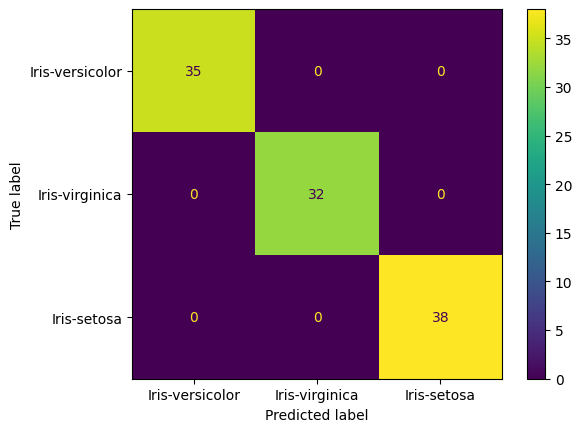

In [16]:
ConfusionMatrixDisplay.from_estimator(newton_model, X_test, newton_pred, display_labels=class_names)
plt.show()

In [17]:
lbfgs_model, lbfgs_pred = train_and_predict_LR("lbfgs")

Точність на навчальних даних: 1.0
Точність на тестових даних: 0.9333333333333333
Матриця невідповідностей:
 [[35  0  0]
 [ 0 31  6]
 [ 0  1 32]]
F1 score: 0.9332652922365109
Jaccard: 0.8786774628879892
Classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.97      0.84      0.90        37
           2       0.84      0.97      0.90        33

    accuracy                           0.93       105
   macro avg       0.94      0.94      0.93       105
weighted avg       0.94      0.93      0.93       105



/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


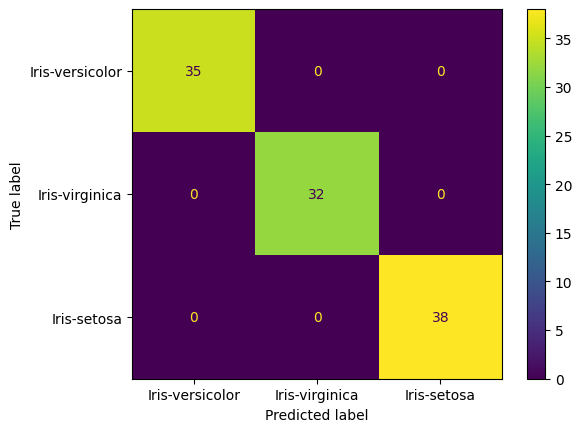

In [18]:
ConfusionMatrixDisplay.from_estimator(lbfgs_model, X_test, lbfgs_pred, display_labels=class_names)
plt.show()

### Завдання №3

* Застосуйте алгоритм SVM з ядром `rbf`, `linear` та `sigmoid` 
* порівняйте результати роботи різних перетворень функцій ядер оціночними критеріями 
* побудуйте багатокласову матрицю невідповідностей, та інтерпретуйте її результати
* зробіть висновки

In [21]:
from sklearn import svm

In [25]:
def train_and_predict_LR(kernel):
    vec_mach = svm.SVC(kernel=kernel).fit(X_train,y_train)
    y_pred = vec_mach.predict(X_test)
    print("Точність на навчальних даних:", metrics.accuracy_score(y_train, vec_mach.predict(X_train)))
    print("Точність на тестових даних:", metrics.accuracy_score(y_test, y_pred))
    print("Матриця невідповідностей:\n", confusion_matrix(y_test, y_pred))
    print("F1 score:", f1_score(y_test, y_pred, average='weighted'))
    print("Jaccard:", jaccard_score(y_test, y_pred, average='weighted'))
    print("Classification report\n", classification_report(y_test, y_pred))
    return vec_mach, y_pred

In [26]:
rbf_svm, rbf_pred = train_and_predict_LR("rbf")

Точність на навчальних даних: 1.0
Точність на тестових даних: 0.9428571428571428
Матриця невідповідностей:
 [[35  0  0]
 [ 0 32  5]
 [ 0  1 32]]
F1 score: 0.9428571428571428
Jaccard: 0.8947368421052632
Classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.97      0.86      0.91        37
           2       0.86      0.97      0.91        33

    accuracy                           0.94       105
   macro avg       0.94      0.94      0.94       105
weighted avg       0.95      0.94      0.94       105



/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


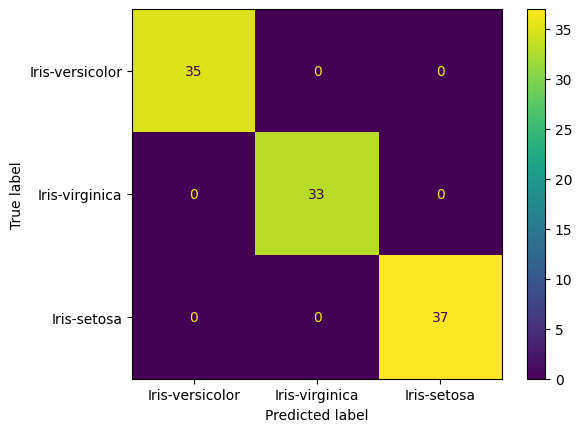

In [27]:
ConfusionMatrixDisplay.from_estimator(rbf_svm, X_test, rbf_pred, display_labels=class_names)
plt.show()

In [28]:
linear_svm, linear_pred = train_and_predict_LR("linear")

Точність на навчальних даних: 1.0
Точність на тестових даних: 0.9523809523809523
Матриця невідповідностей:
 [[35  0  0]
 [ 0 32  5]
 [ 0  0 33]]
F1 score: 0.9523323515975077
Jaccard: 0.9110275689223059
Classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      0.86      0.93        37
           2       0.87      1.00      0.93        33

    accuracy                           0.95       105
   macro avg       0.96      0.95      0.95       105
weighted avg       0.96      0.95      0.95       105



/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


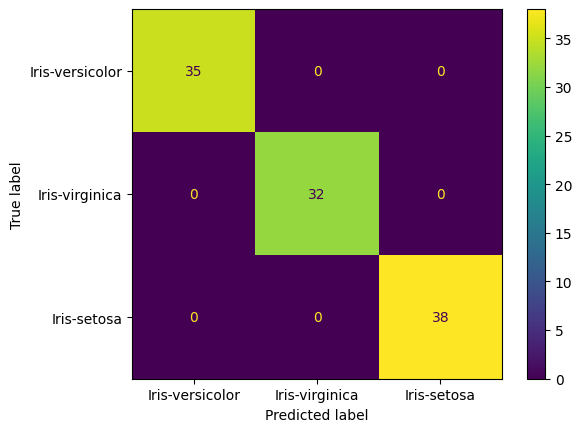

In [29]:
ConfusionMatrixDisplay.from_estimator(linear_svm, X_test, linear_pred, display_labels=class_names)
plt.show()

In [30]:
sigmoid_svm, sigmoid_pred = train_and_predict_LR("sigmoid")

Точність на навчальних даних: 0.9772727272727273
Точність на тестових даних: 0.9142857142857143
Матриця невідповідностей:
 [[35  0  0]
 [ 0 29  8]
 [ 0  1 32]]
F1 score: 0.9139176913865118
Jaccard: 0.8475518063451313
Classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.97      0.78      0.87        37
           2       0.80      0.97      0.88        33

    accuracy                           0.91       105
   macro avg       0.92      0.92      0.91       105
weighted avg       0.93      0.91      0.91       105



/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


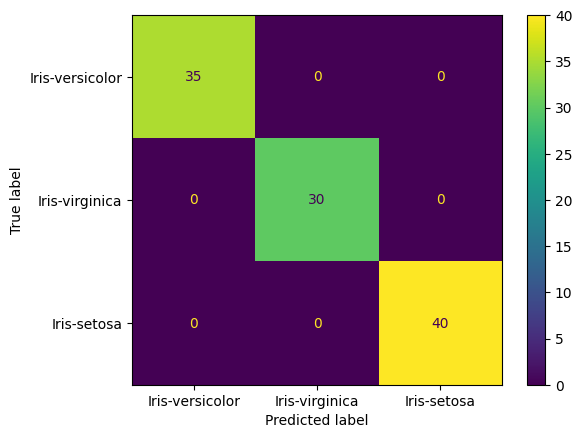

In [31]:
ConfusionMatrixDisplay.from_estimator(sigmoid_svm, X_test, sigmoid_pred, display_labels=class_names)
plt.show()

### Завдання №4

* Порівняйте результати класифікації методами, отриманими в попередньому КП№7, kNN, дерева рішень та LR, SVM для заданого набору даних
* оберіть найкращий метод класифікації, обгрунтуйте ваше рішення



Усі методи класифікації із обох лабораторних робіт показали пристойні результати на обраному наборі даних. Більшість із них досягнули точності більше 0.93 на тестових даних. Найкраще з усіх себе показав методи опорних векторів, що використовує лінійне ядро. Про це свідчать як отримані метрики: точність вища ніж у опонентів, як загалом, так і в окремих категорія; так і побудована матриця, що свідчить про непогану якість класифікації даним методом